In [6]:
import numpy as np
import json_tricks

In [ ]:
def compute_dev(B):
    cur_dev = 0
    for i in range(len(B)):
        for j in range(i):
            cur_dev = max(cur_dev, abs(B[i, j]))

    return cur_dev

def qr_iteration(A):
    devs = []
    cur=compute_dev(A)
    devs.append(cur)
    
    Q, R = np.linalg.qr(A)
    B = R @ Q
    leig = np.diag(B)

    cur=compute_dev(B)
    devs.append(cur)
    dif = 1

    while dif > 1e-10:
        Q, R = np.linalg.qr(B)
        B = R @ Q
        
        neig = np.diag(B)
        dif = 0
        for i in range(len(B)):
            dif += abs(neig[i] - leig[i])
        leig = neig
        cur_dev = compute_dev(B)
        devs.append(cur_dev)

    return leig, devs


In [8]:
from tqdm import tqdm

inputs = json_tricks.load('inputs.json')

results = []
for args in tqdm(inputs):
    res = qr_iteration(**args)
    results.append(res)

json_tricks.dump(results, '.answer.json')

100%|██████████| 100/100 [00:02<00:00, 47.29it/s]


'[[{"__ndarray__": [8.671831433262826, -7.668071821415924, -0.003759611846949912], "dtype": "float64", "shape": [3]}, [6.619646501809262, 7.076227968338235, 7.480668490534941, 7.808656103039963, 8.039328188840866, 8.156693415578804, 8.152186458736816, 8.026141647302406, 7.78773410404108, 7.453406938787763, 7.044264077481263, 6.583146654202125, 6.0920555604100395, 5.590324145838015, 5.093642784600994, 4.613813767585967, 4.159012140862537, 3.734323780722062, 3.3423810275937167, 2.9839795456515534, 2.6586152156802427, 2.3649188135082353, 2.100989509615562, 1.8646397416601, 1.6535680047587407, 1.4654759312196384, 1.2981439332019964, 1.1494769757088035, 1.0175294141234905, 0.9005155627696727, 0.7968108384236008, 0.7049469217821276, 0.6236033360755715, 0.5515970821087868, 0.4878714258377876, 0.4314845522870354, 0.3815985343029685, 0.3374688830845033, 0.2984348250791499, 0.2639103688747456, 0.2333761734089621, 0.20637219614196417, 0.1824910804638715, 0.1613722311328535, 0.1426965219174541, 0.

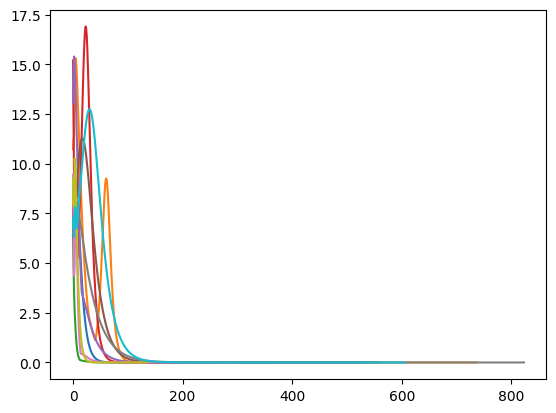

In [5]:
import matplotlib.pyplot as plt

for res in results[:10]:
    misfits = res[1]
    plt.plot(np.array(misfits))

